In [ ]:
!pip install  scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 29.1 MB/s eta 0:00:00


Traffic Density: 75
Waiting Time: 30
Green Light Duration: 51.82373472949389


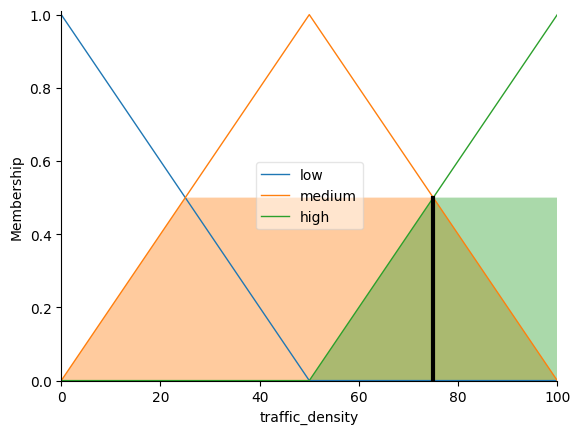

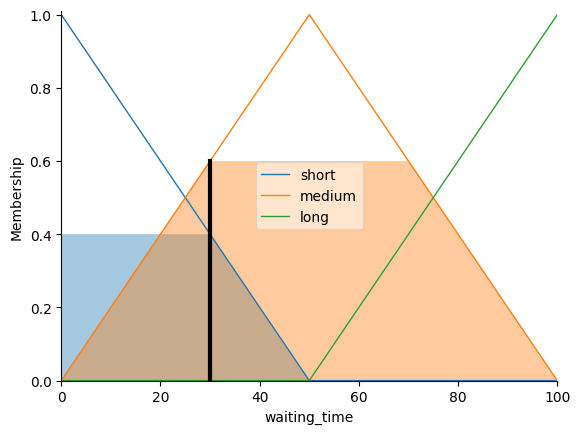

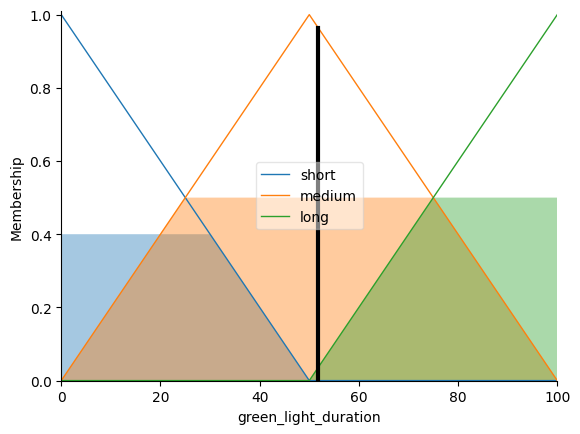

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the fuzzy variables
traffic_density = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_density')
waiting_time = ctrl.Antecedent(np.arange(0, 101, 1), 'waiting_time')
green_light_duration = ctrl.Consequent(np.arange(0, 101, 1), 'green_light_duration')

# Define membership functions for traffic density
traffic_density['low'] = fuzz.trimf(traffic_density.universe, [0, 0, 50, 50, 100])
traffic_density['medium'] = fuzz.trimf(traffic_density.universe, [0, 50, 100,100, 100])
traffic_density['high'] = fuzz.trimf(traffic_density.universe, [50, 50 , 50 100, 100])

# Define membership functions for waiting time
waiting_time['short'] = fuzz.trimf(waiting_time.universe, [0, 0, 50 ,50 , 100])
waiting_time['medium'] = fuzz.trimf(waiting_time.universe, [0, 50, 100 , 100, 100])
waiting_time['long'] = fuzz.trimf(waiting_time.universe, [50, 50 , 50 , 100, 100])

# Define membership functions for green light duration
green_light_duration['short'] = fuzz.trimf(green_light_duration.universe, [0, 0, 50, 50 ,100])
green_light_duration['medium'] = fuzz.trimf(green_light_duration.universe, [0, 50, 100 , 100, 100])
green_light_duration['long'] = fuzz.trimf(green_light_duration.universe, [50, 50 , 50 , 100, 100])

# Define the rules
rule1 = ctrl.Rule(traffic_density['very very low'] & waiting_time['short'], green_light_duration['short'])
rule2= ctrl.Rule(traffic density[' very low '] & waiting_time['very short'],green_light_duration['very short'])
rule = ctrl.Rule(traffic_density['low'] & waiting_time['medium'], green_light_duration['short'])
rule3 = ctrl.Rule(traffic_density['low'] & waiting_time['long'], green_light_duration['medium'])
rule4 = ctrl.Rule(traffic_density['medium'] & waiting_time['short'], green_light_duration['short'])
rule5 = ctrl.Rule(traffic_density['medium'] & waiting_time['medium'], green_light_duration['medium'])
rule6 = ctrl.Rule(traffic_density['medium'] & waiting_time['long'], green_light_duration['long'])
rule7 = ctrl.Rule(traffic_density['high'] & waiting_time['short'], green_light_duration['medium'])
rule8 = ctrl.Rule(traffic_density['high'] & waiting_time['medium'], green_light_duration['long'])
rule9 = ctrl.Rule(traffic_density['high'] & waiting_time['long'], green_light_duration['long'])

# Create the control system
traffic_control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
traffic_control_simulation = ctrl.ControlSystemSimulation(traffic_control_system)

# Function to simulate and visualize traffic control
def simulate_traffic_control(traffic_density_value, waiting_time_value):
    traffic_control_simulation.input['traffic_density'] = traffic_density_value
    traffic_control_simulation.input['waiting_time'] = waiting_time_value

    # Compute the result
    traffic_control_simulation.compute()

    green_light_duration_value = traffic_control_simulation.output['green_light_duration']

    # Visualize the results
    traffic_density.view(sim=traffic_control_simulation)
    waiting_time.view(sim=traffic_control_simulation)
    green_light_duration.view(sim=traffic_control_simulation)

    print(f"Traffic Density: {traffic_density_value}")
    print(f"Waiting Time: {waiting_time_value}")
    print(f"Green Light Duration: {green_light_duration_value}")

    plt.show()

# Example simulation
simulate_traffic_control(75, 30)



In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the fuzzy variables
traffic_density = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_density')
waiting_time = ctrl.Antecedent(np.arange(0, 101, 1), 'waiting_time')
green_light_duration = ctrl.Consequent(np.arange(0, 101, 1), 'green_light_duration')

# Define membership functions for traffic density
traffic_density['low'] = fuzz.trimf(traffic_density.universe, [0, 0, 50])
traffic_density['medium'] = fuzz.trimf(traffic_density.universe, [0, 50, 100])
traffic_density['high'] = fuzz.trimf(traffic_density.universe, [50, 100, 100])

# Define membership functions for waiting time
waiting_time['short'] = fuzz.trimf(waiting_time.universe, [0, 0, 50])
waiting_time['medium'] = fuzz.trimf(waiting_time.universe, [0, 50, 100])
waiting_time['long'] = fuzz.trimf(waiting_time.universe, [50, 100, 100])

# Define membership functions for green light duration
green_light_duration['short'] = fuzz.trimf(green_light_duration.universe, [0, 0, 50])
green_light_duration['medium'] = fuzz.trimf(green_light_duration.universe, [0, 50, 100])
green_light_duration['long'] = fuzz.trimf(green_light_duration.universe, [50, 100, 100])

# Define the rules
rule1 = ctrl.Rule(traffic_density['low'] & waiting_time['short'], green_light_duration['short'])
rule2 = ctrl.Rule(traffic_density['low'] & waiting_time['medium'], green_light_duration['short'])
rule3 = ctrl.Rule(traffic_density['low'] & waiting_time['long'], green_light_duration['medium'])
rule4 = ctrl.Rule(traffic_density['medium'] & waiting_time['short'], green_light_duration['short'])
rule5 = ctrl.Rule(traffic_density['medium'] & waiting_time['medium'], green_light_duration['medium'])
rule6 = ctrl.Rule(traffic_density['medium'] & waiting_time['long'], green_light_duration['long'])
rule7 = ctrl.Rule(traffic_density['high'] & waiting_time['short'], green_light_duration['medium'])
rule8 = ctrl.Rule(traffic_density['high'] & waiting_time['medium'], green_light_duration['long'])
rule9 = ctrl.Rule(traffic_density['high'] & waiting_time['long'], green_light_duration['long'])

# Create the control system
traffic_control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
traffic_control_simulation = ctrl.ControlSystemSimulation(traffic_control_system)

# Example inputs
inputs = [
    (10, 10),
    (25, 70),
    (70, 30),
    (90, 90),
    (50, 50),
]

for traffic_density_value, waiting_time_value in inputs:
    traffic_control_simulation.input['traffic_density'] = traffic_density_value
    traffic_control_simulation.input['waiting_time'] = waiting_time_value

    # Compute the result
    traffic_control_simulation.compute()

    # Output the result
    print(f"Traffic Density: {traffic_density_value}, Waiting Time: {waiting_time_value}")
    print(f"Green Light Duration: {traffic_control_simulation.output['green_light_duration']}\n")

    # Visualize the result
    green_light_duration.view(sim=traffic_control_simulation)

plt.show()


ModuleNotFoundError: No module named 'skfuzzy'

In [ ]:
pip install pygame


In [ ]:
import pygame
import time

# Initialize Pygame
pygame.init()

# Screen dimensions
screen_width = 800
screen_height = 600

# Colors
white = (255, 255, 255)
red = (255, 0, 0)
green = (0, 255, 0)
yellow = (255, 255, 0)
black = (0, 0, 0)

# Set up the screen
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption("Traffic Signal Simulation")

# Car class
class Car(pygame.sprite.Sprite):
    def __init__(self, color, width, height, speed):
        super().__init__()
        self.image = pygame.Surface([width, height])
        self.image.fill(color)
        self.rect = self.image.get_rect()
        self.speed = speed

    def update(self):
        self.rect.x += self.speed

        if self.rect.x > screen_width:
            self.rect.x = -self.rect.width

# Create a car
car = Car(black, 60, 30, 5)
all_sprites = pygame.sprite.Group()
all_sprites.add(car)

# Traffic light class
class TrafficLight:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.state = "red"
        self.last_change = time.time()

    def update(self):
        current_time = time.time()
        if self.state == "red" and current_time - self.last_change > 5:
            self.state = "green"
            self.last_change = current_time
        elif self.state == "green" and current_time - self.last_change > 5:
            self.state = "yellow"
            self.last_change = current_time
        elif self.state == "yellow" and current_time - self.last_change > 2:
            self.state = "red"
            self.last_change = current_time

    def draw(self, screen):
        if self.state == "red":
            pygame.draw.circle(screen, red, (self.x, self.y), 20)
        elif self.state == "green":
            pygame.draw.circle(screen, green, (self.x, self.y), 20)
        elif self.state == "yellow":
            pygame.draw.circle(screen, yellow, (self.x, self.y), 20)

# Create a traffic light
traffic_light = TrafficLight(screen_width // 2, screen_height // 2)

# Main loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Update traffic light
    traffic_light.update()

    # Update car position
    if traffic_light.state == "green" or traffic_light.state == "yellow":
        all_sprites.update()

    # Clear the screen
    screen.fill(white)

    # Draw traffic light
    traffic_light.draw(screen)

    # Draw all sprites (cars)
    all_sprites.draw(screen)

    # Update the screen
    pygame.display.flip()

    # Cap the frame rate
    pygame.time.Clock().tick(60)

pygame.quit()


pygame 2.6.0 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: 

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the fuzzy variables
traffic_density = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_density')
waiting_time = ctrl.Antecedent(np.arange(0, 101, 1), 'waiting_time')
green_light_duration = ctrl.Consequent(np.arange(0, 101, 1), 'green_light_duration')

# Define membership functions for traffic density
traffic_density['low'] = fuzz.trimf(traffic_density.universe, [0, 0, 50])
traffic_density['medium'] = fuzz.trimf(traffic_density.universe, [0, 50, 100])
traffic_density['high'] = fuzz.trimf(traffic_density.universe, [50, 100, 100])

# Define membership functions for waiting time
waiting_time['short'] = fuzz.trimf(waiting_time.universe, [0, 0, 50])
waiting_time['medium'] = fuzz.trimf(waiting_time.universe, [0, 50, 100])
waiting_time['long'] = fuzz.trimf(waiting_time.universe, [50, 100, 100])

# Define membership functions for green light duration
green_light_duration['short'] = fuzz.trimf(green_light_duration.universe, [0, 0, 50])
green_light_duration['medium'] = fuzz.trimf(green_light_duration.universe, [0, 50, 100])
green_light_duration['long'] = fuzz.trimf(green_light_duration.universe, [50, 100, 100])

# Define the rules
rule1 = ctrl.Rule(traffic_density['low'] & waiting_time['short'], green_light_duration['short'])
rule2 = ctrl.Rule(traffic_density['low'] & waiting_time['medium'], green_light_duration['short'])
rule3 = ctrl.Rule(traffic_density['low'] & waiting_time['long'], green_light_duration['medium'])
rule4 = ctrl.Rule(traffic_density['medium'] & waiting_time['short'], green_light_duration['short'])
rule5 = ctrl.Rule(traffic_density['medium'] & waiting_time['medium'], green_light_duration['medium'])
rule6 = ctrl.Rule(traffic_density['medium'] & waiting_time['long'], green_light_duration['long'])
rule7 = ctrl.Rule(traffic_density['high'] & waiting_time['short'], green_light_duration['medium'])
rule8 = ctrl.Rule(traffic_density['high'] & waiting_time['medium'], green_light_duration['long'])
rule9 = ctrl.Rule(traffic_density['high'] & waiting_time['long'], green_light_duration['long'])

# Create the control system
traffic_control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
traffic_control_simulation = ctrl.ControlSystemSimulation(traffic_control_system)

# Function to simulate and visualize traffic control
def simulate_traffic_control(traffic_density_value, waiting_time_value):
    traffic_control_simulation.input['traffic_density'] = traffic_density_value
    traffic_control_simulation.input['waiting_time'] = waiting_time_value

    # Compute the result
    traffic_control_simulation.compute()

    green_light_duration_value = traffic_control_simulation.output['green_light_duration']

    # Visualize the results
    traffic_density.view(sim=traffic_control_simulation)
    waiting_time.view(sim=traffic_control_simulation)
    green_light_duration.view(sim=traffic_control_simulation)

    print(f"Traffic Density: {traffic_density_value}")
    print(f"Waiting Time: {waiting_time_value}")
    print(f"Green Light Duration: {green_light_duration_value}")

    plt.show()

In [ ]:
import pygame
import time

from src.Common import Lane, DoubleLane
from src.Config import Config
from src.Controller.VehicleController import VehicleController
from src.Controller.TrafficController import TrafficController
from src.Controller.BackgroundController import BackgroundController


class Simulator:
    def __init__(self, caption):
        self.caption = caption
        self.surface = pygame.display.set_mode((Config['simulator']['screen_width'],
                                                Config['simulator']['screen_height']))
        self.vehicle_ctrl = VehicleController(self.surface)
        self.traffic_ctrl = TrafficController(self.surface)
        self.background_ctrl = BackgroundController(self.surface,
                                                    self.traffic_ctrl.get_traffic_lights(DoubleLane.Horizontal) +
                                                    self.traffic_ctrl.get_traffic_lights(DoubleLane.Vertical))
        self.clock = pygame.time.Clock()
        self.gap_between_switch = Config['simulator']['gap_between_traffic_switch']

        self.HORIZONTAL_SPAWN_EVENT = pygame.USEREVENT + 1
        self.VERTICAL_SPAWN_EVENT = pygame.USEREVENT + 2

        self.switching_traffic = False
        self.switching_traffic_start_time = None
        self.start_time = time.time()
        self.moving_averages = self.vehicle_ctrl.get_moving_averages_num_vehicles_behind_traffic()

        self.is_extended = False
        self.green_light_remaining_time = Config['traffic_light']['green_light_duration']
        self.extension_notification_start_time = time.time() - 10

    def spawn(self, double_lane: DoubleLane):
        if double_lane == DoubleLane.Horizontal:
            self.spawn_single_vehicle(Lane.left_to_right)
            self.spawn_single_vehicle(Lane.right_to_left)
        elif double_lane == DoubleLane.Vertical:
            self.spawn_single_vehicle(Lane.bottom_to_top)
            self.spawn_single_vehicle(Lane.top_to_bottom)

    def spawn_single_vehicle(self, lane: Lane):
        self.vehicle_ctrl.create_vehicle(lane, self.traffic_ctrl.traffic_lights[lane])

    def main_loop(self):
        game_over = False

        pygame.time.set_timer(self.HORIZONTAL_SPAWN_EVENT, Config['simulator']['spawn_rate']['slow'])
        pygame.time.set_timer(self.VERTICAL_SPAWN_EVENT, Config['simulator']['spawn_rate']['slow'])

        while not game_over:

            for event in pygame.event.get():
                if event.type == self.HORIZONTAL_SPAWN_EVENT:
                    rate = self.background_ctrl.get_spawn_rate(DoubleLane.Horizontal)
                    pygame.time.set_timer(self.HORIZONTAL_SPAWN_EVENT, Config['simulator']['spawn_rate'][rate])
                    self.spawn(DoubleLane.Horizontal)

                if event.type == self.VERTICAL_SPAWN_EVENT:
                    rate = self.background_ctrl.get_spawn_rate(DoubleLane.Vertical)
                    pygame.time.set_timer(self.VERTICAL_SPAWN_EVENT, Config['simulator']['spawn_rate'][rate])
                    self.spawn(DoubleLane.Vertical)

                if event.type == pygame.QUIT:
                    game_over = True

                if event.type == pygame.MOUSEBUTTONDOWN:
                    for double_lane in [DoubleLane.Horizontal, DoubleLane.Vertical]:
                        for rate in ['slow', 'medium', 'fast']:
                            if self.background_ctrl.spawn_rate_buttons[double_lane][rate].collidepoint(event.pos):
                                self.background_ctrl.set_spawn_rate(double_lane, rate)
                    # if self.background_ctrl.fuzzy_button.collidepoint(event.pos):
                    #     moving_averages = self.vehicle_ctrl.get_moving_averages_num_vehicles_behind_traffic()
                    #     print(self.calculate_fuzzy_score(moving_averages))

            self.background_ctrl.refresh_screen()
            self.background_ctrl.draw_road_markings()
            self.background_ctrl.draw_vehicle_count(self.vehicle_ctrl.counter)
            self.background_ctrl.draw_spawn_rate_buttons()
            self.background_ctrl.draw_light_durations(self.traffic_ctrl.get_green_light_extension())

            # print(self.traffic_ctrl.get_green_light_remaining())

            self.traffic_ctrl.update_and_draw_traffic_lights()
            self.vehicle_ctrl.destroy_vehicles_outside_canvas()
            self.vehicle_ctrl.update_and_draw_vehicles()
            self.vehicle_ctrl.update_num_vehicles_behind_traffic()

            if round((time.time() - self.start_time), 1) % Config['simulator']['static_duration'] == 0:
                self.moving_averages = self.vehicle_ctrl.get_moving_averages_num_vehicles_behind_traffic()
            self.background_ctrl.draw_moving_averages(self.moving_averages)

            current_green_light_remaining_time = self.traffic_ctrl.get_green_light_remaining()
            direction_changed = current_green_light_remaining_time > self.green_light_remaining_time
            self.green_light_remaining_time = current_green_light_remaining_time

            if not self.is_extended:
                if current_green_light_remaining_time <= Config['simulator']['seconds_before_extension']:
                    fuzzy_score = self.calculate_fuzzy_score(self.moving_averages)
                    self.horizontal = self.moving_averages[Lane.left_to_right]
                    self.vertical = self.moving_averages[Lane.top_to_bottom]
                    self.background_ctrl.draw_fuzzy_score(fuzzy_score, self.traffic_ctrl.get_current_active_lane())
                    self.traffic_ctrl.set_green_light_extension(fuzzy_score)
                    self.is_extended = True
                    self.extension_notification_start_time = time.time()
                    self.green_light_remaining_time = self.traffic_ctrl.get_green_light_remaining()
            else:
                if direction_changed:
                    self.traffic_ctrl.clear_all_green_light_extension()
                    self.is_extended = False

            if time.time() - self.extension_notification_start_time < Config['simulator']['fuzzy_notification_duration']:
                self.background_ctrl.draw_extension_notification(self.traffic_ctrl.get_green_light_extension(), self.horizontal, self.vertical)

            pygame.display.update()
            self.clock.tick(Config['simulator']['frame_rate'])

    def calculate_fuzzy_score(self, moving_averages):
        traffic_state = self.traffic_ctrl.get_current_active_lane()
        if self.is_extended :
            ext_count = 1
        else:
            ext_count =0

        if traffic_state == DoubleLane.Vertical:
            return self.traffic_ctrl.calculate_fuzzy_score(moving_averages[Lane.top_to_bottom], moving_averages[Lane.left_to_right], ext_count)
        elif traffic_state == DoubleLane.Horizontal:
            return self.traffic_ctrl.calculate_fuzzy_score(moving_averages[Lane.left_to_right], moving_averages[Lane.top_to_bottom], ext_count)

    def initialize(self):
        self.spawn(DoubleLane.Horizontal)
        self.spawn(DoubleLane.Vertical)
        # self.toggle_traffic()

    def start(self):
        pygame.init()
        pygame.display.set_caption(self.caption)

        self.initialize()
        self.main_loop()

        pygame.quit()
        quit()












ModuleNotFoundError: No module named 'src'

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the fuzzy variables
traffic_density = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_density')
waiting_time = ctrl.Antecedent(np.arange(0, 101, 1), 'waiting_time')
green_light_duration = ctrl.Consequent(np.arange(0, 101, 1), 'green_light_duration')

# Define membership functions for traffic density
traffic_density['low'] = fuzz.trimf(traffic_density.universe, [0, 0, 50])
traffic_density['medium'] = fuzz.trimf(traffic_density.universe, [0, 50, 100])
traffic_density['high'] = fuzz.trimf(traffic_density.universe, [50, 100, 100])

# Define membership functions for waiting time
waiting_time['short'] = fuzz.trimf(waiting_time.universe, [0, 0, 50])
waiting_time['medium'] = fuzz.trimf(waiting_time.universe, [0, 50, 100])
waiting_time['long'] = fuzz.trimf(waiting_time.universe, [50, 100, 100])

# Define membership functions for green light duration
green_light_duration['short'] = fuzz.trimf(green_light_duration.universe, [0, 0, 50])
green_light_duration['medium'] = fuzz.trimf(green_light_duration.universe, [0, 50, 100])
green_light_duration['long'] = fuzz.trimf(green_light_duration.universe, [50, 100, 100])

# Define the rules
rule1 = ctrl.Rule(traffic_density['low'] & waiting_time['short'], green_light_duration['short'])
rule2 = ctrl.Rule(traffic_density['low'] & waiting_time['medium'], green_light_duration['short'])
rule3 = ctrl.Rule(traffic_density['low'] & waiting_time['long'], green_light_duration['medium'])
rule4 = ctrl.Rule(traffic_density['medium'] & waiting_time['short'], green_light_duration['short'])
rule5 = ctrl.Rule(traffic_density['medium'] & waiting_time['medium'], green_light_duration['medium'])
rule6 = ctrl.Rule(traffic_density['medium'] & waiting_time['long'], green_light_duration['long'])
rule7 = ctrl.Rule(traffic_density['high'] & waiting_time['short'], green_light_duration['medium'])
rule8 = ctrl.Rule(traffic_density['high'] & waiting_time['medium'], green_light_duration['long'])
rule9 = ctrl.Rule(traffic_density['high'] & waiting_time['long'], green_light_duration['long'])

# Create the control system
traffic_control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
traffic_control_simulation = ctrl.ControlSystemSimulation(traffic_control_system)

# Function to simulate and visualize traffic control
def simulate_traffic_control(traffic_density_value, waiting_time_value):
    traffic_control_simulation.input['traffic_density'] = traffic_density_value
    traffic_control_simulation.input['waiting_time'] = waiting_time_value

    # Compute the result
    traffic_control_simulation.compute()

    green_light_duration_value = traffic_control_simulation.output['green_light_duration']

    # Visualize the results
    traffic_density.view(sim=traffic_control_simulation)
    waiting_time.view(sim=traffic_control_simulation)
    green_light_duration.view(sim=traffic_control_simulation)

    print(f"Traffic Density: {traffic_density_value}")
    print(f"Waiting Time: {waiting_time_value}")
    print(f"Green Light Duration: {green_light_duration_value}")

    plt.show()

ModuleNotFoundError: No module named 'skfuzzy'

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the fuzzy variables
traffic_density = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_density')
waiting_time = ctrl.Antecedent(np.arange(0, 101, 1), 'waiting_time')
green_light_duration = ctrl.Consequent(np.arange(0, 101, 1), 'green_light_duration')

# Define membership functions for traffic density
traffic_density['very_low'] = fuzz.trimf(traffic_density.universe, [0, 0, 20])
traffic_density['low'] = fuzz.trimf(traffic_density.universe, [0, 20, 40])
traffic_density['medium_low'] = fuzz.trimf(traffic_density.universe, [20, 40, 60])
traffic_density['medium'] = fuzz.trimf(traffic_density.universe, [40, 60, 80])
traffic_density['medium_high'] = fuzz.trimf(traffic_density.universe, [60, 80, 100])
traffic_density['high'] = fuzz.trimf(traffic_density.universe, [80, 100, 100])

# Define membership functions for waiting time
waiting_time['very_short'] = fuzz.trimf(waiting_time.universe, [0, 0, 20])
waiting_time['short'] = fuzz.trimf(waiting_time.universe, [0, 20, 40])
waiting_time['medium_short'] = fuzz.trimf(waiting_time.universe, [20, 40, 60])
waiting_time['medium'] = fuzz.trimf(waiting_time.universe, [40, 60, 80])
waiting_time['medium_long'] = fuzz.trimf(waiting_time.universe, [60, 80, 100])
waiting_time['long'] = fuzz.trimf(waiting_time.universe, [80, 100, 100])

# Define membership functions for green light duration
green_light_duration['very_short'] = fuzz.trimf(green_light_duration.universe, [0, 0, 20])
green_light_duration['short'] = fuzz.trimf(green_light_duration.universe, [0, 20, 40])
green_light_duration['medium_short'] = fuzz.trimf(green_light_duration.universe, [20, 40, 60])
green_light_duration['medium'] = fuzz.trimf(green_light_duration.universe, [40, 60, 80])
green_light_duration['medium_long'] = fuzz.trimf(green_light_duration.universe, [60, 80, 100])
green_light_duration['long'] = fuzz.trimf(green_light_duration.universe, [80, 100, 100])

# Define the rules
rules = [
    ctrl.Rule(traffic_density['very_low'] & waiting_time['very_short'], green_light_duration['very_short']),
    ctrl.Rule(traffic_density['very_low'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['very_low'] & waiting_time['medium_short'], green_light_duration['medium_short']),
    ctrl.Rule(traffic_density['very_low'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['very_low'] & waiting_time['medium_long'], green_light_duration['medium_long']),
    ctrl.Rule(traffic_density['very_low'] & waiting_time['long'], green_light_duration['long']),

    ctrl.Rule(traffic_density['low'] & waiting_time['very_short'], green_light_duration['very_short']),
    ctrl.Rule(traffic_density['low'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['low'] & waiting_time['medium_short'], green_light_duration['medium_short']),
    ctrl.Rule(traffic_density['low'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['low'] & waiting_time['medium_long'], green_light_duration['medium_long']),
    ctrl.Rule(traffic_density['low'] & waiting_time['long'], green_light_duration['long']),

    ctrl.Rule(traffic_density['medium_low'] & waiting_time['very_short'], green_light_duration['very_short']),
    ctrl.Rule(traffic_density['medium_low'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['medium_low'] & waiting_time['medium_short'], green_light_duration['medium_short']),
    ctrl.Rule(traffic_density['medium_low'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['medium_low'] & waiting_time['medium_long'], green_light_duration['medium_long']),
    ctrl.Rule(traffic_density['medium_low'] & waiting_time['long'], green_light_duration['long']),

    ctrl.Rule(traffic_density['medium'] & waiting_time['very_short'], green_light_duration['very_short']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['medium_short'], green_light_duration['medium_short']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['medium_long'], green_light_duration['medium_long']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['long'], green_light_duration['long']),

    ctrl.Rule(traffic_density['medium_high'] & waiting_time['very_short'], green_light_duration['very_short']),
    ctrl.Rule(traffic_density['medium_high'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['medium_high'] & waiting_time['medium_short'], green_light_duration['medium_short']),
    ctrl.Rule(traffic_density['medium_high'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['medium_high'] & waiting_time['medium_long'], green_light_duration['medium_long']),
    ctrl.Rule(traffic_density['medium_high'] & waiting_time['long'], green_light_duration['long']),

    ctrl.Rule(traffic_density['high'] & waiting_time['very_short'], green_light_duration['very_short']),
    ctrl.Rule(traffic_density['high'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['high'] & waiting_time['medium_short'], green_light_duration['medium_short']),
    ctrl.Rule(traffic_density['high'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['high'] & waiting_time['medium_long'], green_light_duration['medium_long']),
    ctrl.Rule(traffic_density['high'] & waiting_time['long'], green_light_duration['long']),
]

# Create the control system
traffic_control_system = ctrl.ControlSystem(rules)
traffic_control_simulation = ctrl.ControlSystemSimulation(traffic_control_system)

# Function to simulate and visualize traffic control
def simulate_traffic_control(traffic_density_value, waiting_time_value):
    traffic_control_simulation.input['traffic_density'] = traffic_density_value
    traffic_control_simulation.input['waiting_time'] = waiting_time_value

    # Compute the result
    traffic_control_simulation.compute()

    green_light_duration_value = traffic_control_simulation.output['green_light_duration']

    # Visualize the results
    traffic_density.view(sim=traffic_control_simulation)
    waiting_time.view(sim=traffic_control_simulation)
    green_light_duration.view(sim=traffic_control_simulation)

    print(f"Traffic Density: {traffic_density_value}")
    print(f"Waiting Time: {waiting_time_value}")
    print(f"Green Light Duration: {green_light_duration_value}")

    plt.show()

# Example simulation
simulate_traffic_control(75, 30)


ModuleNotFoundError: No module named 'skfuzzy'

In [ ]:
!pip install  scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.9 MB/s eta 0:00:00


Traffic Density: 75
Waiting Time: 30
Green Light Duration: 29.999999999999996


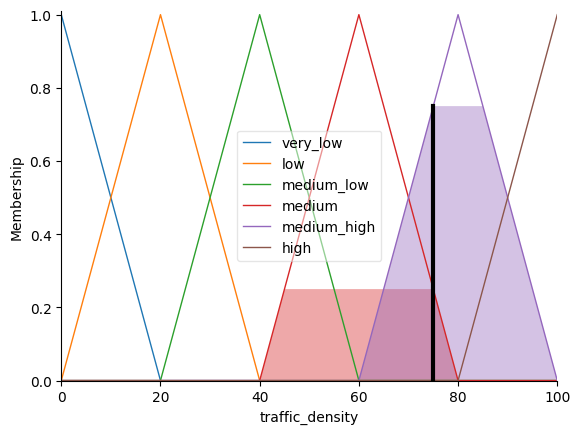

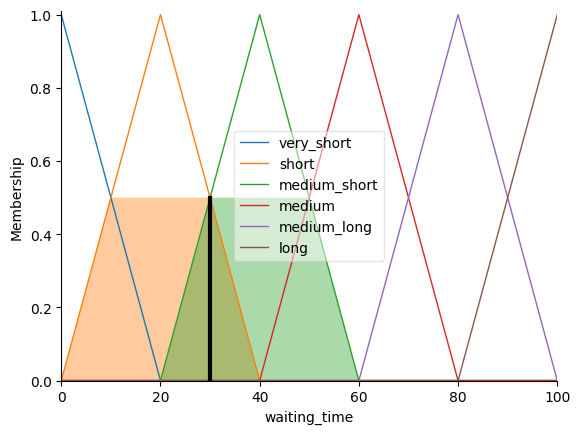

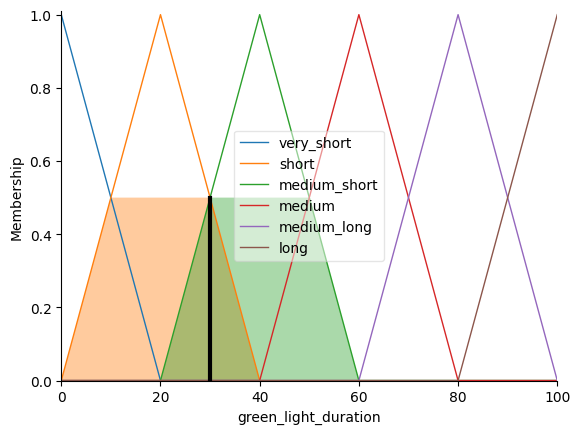

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the fuzzy variables
traffic_density = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_density')
waiting_time = ctrl.Antecedent(np.arange(0, 101, 1), 'waiting_time')
green_light_duration = ctrl.Consequent(np.arange(0, 101, 1), 'green_light_duration')

# Define membership functions for traffic density
traffic_density['very_low'] = fuzz.trimf(traffic_density.universe, [0, 0, 20])
traffic_density['low'] = fuzz.trimf(traffic_density.universe, [0, 20, 40])
traffic_density['medium_low'] = fuzz.trimf(traffic_density.universe, [20, 40, 60])
traffic_density['medium'] = fuzz.trimf(traffic_density.universe, [40, 60, 80])
traffic_density['medium_high'] = fuzz.trimf(traffic_density.universe, [60, 80, 100])
traffic_density['high'] = fuzz.trimf(traffic_density.universe, [80, 100, 100])

# Define membership functions for waiting time
waiting_time['very_short'] = fuzz.trimf(waiting_time.universe, [0, 0, 20])
waiting_time['short'] = fuzz.trimf(waiting_time.universe, [0, 20, 40])
waiting_time['medium_short'] = fuzz.trimf(waiting_time.universe, [20, 40, 60])
waiting_time['medium'] = fuzz.trimf(waiting_time.universe, [40, 60, 80])
waiting_time['medium_long'] = fuzz.trimf(waiting_time.universe, [60, 80, 100])
waiting_time['long'] = fuzz.trimf(waiting_time.universe, [80, 100, 100])

# Define membership functions for green light duration
green_light_duration['very_short'] = fuzz.trimf(green_light_duration.universe, [0, 0, 20])
green_light_duration['short'] = fuzz.trimf(green_light_duration.universe, [0, 20, 40])
green_light_duration['medium_short'] = fuzz.trimf(green_light_duration.universe, [20, 40, 60])
green_light_duration['medium'] = fuzz.trimf(green_light_duration.universe, [40, 60, 80])
green_light_duration['medium_long'] = fuzz.trimf(green_light_duration.universe, [60, 80, 100])
green_light_duration['long'] = fuzz.trimf(green_light_duration.universe, [80, 100, 100])

# Define the rules
rules = [
    ctrl.Rule(traffic_density['very_low'] & waiting_time['very_short'], green_light_duration['very_short']),
    ctrl.Rule(traffic_density['very_low'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['very_low'] & waiting_time['medium_short'], green_light_duration['medium_short']),
    ctrl.Rule(traffic_density['very_low'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['very_low'] & waiting_time['medium_long'], green_light_duration['medium_long']),
    ctrl.Rule(traffic_density['very_low'] & waiting_time['long'], green_light_duration['long']),

    ctrl.Rule(traffic_density['low'] & waiting_time['very_short'], green_light_duration['very_short']),
    ctrl.Rule(traffic_density['low'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['low'] & waiting_time['medium_short'], green_light_duration['medium_short']),
    ctrl.Rule(traffic_density['low'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['low'] & waiting_time['medium_long'], green_light_duration['medium_long']),
    ctrl.Rule(traffic_density['low'] & waiting_time['long'], green_light_duration['long']),

    ctrl.Rule(traffic_density['medium_low'] & waiting_time['very_short'], green_light_duration['very_short']),
    ctrl.Rule(traffic_density['medium_low'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['medium_low'] & waiting_time['medium_short'], green_light_duration['medium_short']),
    ctrl.Rule(traffic_density['medium_low'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['medium_low'] & waiting_time['medium_long'], green_light_duration['medium_long']),
    ctrl.Rule(traffic_density['medium_low'] & waiting_time['long'], green_light_duration['long']),

    ctrl.Rule(traffic_density['medium'] & waiting_time['very_short'], green_light_duration['very_short']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['medium_short'], green_light_duration['medium_short']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['medium_long'], green_light_duration['medium_long']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['long'], green_light_duration['long']),

    ctrl.Rule(traffic_density['medium_high'] & waiting_time['very_short'], green_light_duration['very_short']),
    ctrl.Rule(traffic_density['medium_high'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['medium_high'] & waiting_time['medium_short'], green_light_duration['medium_short']),
    ctrl.Rule(traffic_density['medium_high'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['medium_high'] & waiting_time['medium_long'], green_light_duration['medium_long']),
    ctrl.Rule(traffic_density['medium_high'] & waiting_time['long'], green_light_duration['long']),

    ctrl.Rule(traffic_density['high'] & waiting_time['very_short'], green_light_duration['very_short']),
    ctrl.Rule(traffic_density['high'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['high'] & waiting_time['medium_short'], green_light_duration['medium_short']),
    ctrl.Rule(traffic_density['high'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['high'] & waiting_time['medium_long'], green_light_duration['medium_long']),
    ctrl.Rule(traffic_density['high'] & waiting_time['long'], green_light_duration['long']),
]

# Create the control system
traffic_control_system = ctrl.ControlSystem(rules)
traffic_control_simulation = ctrl.ControlSystemSimulation(traffic_control_system)

# Function to simulate and visualize traffic control
def simulate_traffic_control(traffic_density_value, waiting_time_value):
    traffic_control_simulation.input['traffic_density'] = traffic_density_value
    traffic_control_simulation.input['waiting_time'] = waiting_time_value

    # Compute the result
    traffic_control_simulation.compute()

    green_light_duration_value = traffic_control_simulation.output['green_light_duration']

    # Visualize the results
    traffic_density.view(sim=traffic_control_simulation)
    waiting_time.view(sim=traffic_control_simulation)
    green_light_duration.view(sim=traffic_control_simulation)

    print(f"Traffic Density: {traffic_density_value}")
    print(f"Waiting Time: {waiting_time_value}")
    print(f"Green Light Duration: {green_light_duration_value}")

    plt.show()

# Example simulation
simulate_traffic_control(75, 30)


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the fuzzy variables
traffic_density = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_density')
waiting_time = ctrl.Antecedent(np.arange(0, 101, 1), 'waiting_time')
green_light_duration = ctrl.Consequent(np.arange(0, 101, 1), 'green_light_duration')

# Define membership functions for traffic density
traffic_density['very low'] = fuzz.trimf(traffic_density.universe, [0, 0, 25])
traffic_density['low'] = fuzz.trimf(traffic_density.universe, [0, 25, 50])
traffic_density['medium low'] = fuzz.trimf(traffic_density.universe, [25, 50, 75])
traffic_density['medium'] = fuzz.trimf(traffic_density.universe, [50, 75, 100])
traffic_density['medium high'] = fuzz.trimf(traffic_density.universe, [75, 100, 100])
traffic_density['high'] = fuzz.trimf(traffic_density.universe, [50, 75, 100])
traffic_density['very high'] = fuzz.trimf(traffic_density.universe, [75, 100, 100])
traffic_density['extremely high'] = fuzz.trimf(traffic_density.universe, [90, 100, 100])

# Define membership functions for waiting time
waiting_time['very short'] = fuzz.trimf(waiting_time.universe, [0, 0, 25])
waiting_time['short'] = fuzz.trimf(waiting_time.universe, [0, 25, 50])
waiting_time['medium short'] = fuzz.trimf(waiting_time.universe, [25, 50, 75])
waiting_time['medium'] = fuzz.trimf(waiting_time.universe, [50, 75, 100])
waiting_time['medium long'] = fuzz.trimf(waiting_time.universe, [75, 100, 100])
waiting_time['long'] = fuzz.trimf(waiting_time.universe, [50, 75, 100])
waiting_time['very long'] = fuzz.trimf(waiting_time.universe, [75, 100, 100])
waiting_time['extremely long'] = fuzz.trimf(waiting_time.universe, [90, 100, 100])

# Define membership functions for green light duration
green_light_duration['very short'] = fuzz.trimf(green_light_duration.universe, [0, 0, 25])
green_light_duration['short'] = fuzz.trimf(green_light_duration.universe, [0, 25, 50])
green_light_duration['medium short'] = fuzz.trimf(green_light_duration.universe, [25, 50, 75])
green_light_duration['medium'] = fuzz.trimf(green_light_duration.universe, [50, 75, 100])
green_light_duration['medium long'] = fuzz.trimf(green_light_duration.universe, [75, 100, 100])
green_light_duration['long'] = fuzz.trimf(green_light_duration.universe, [50, 75, 100])
green_light_duration['very long'] = fuzz.trimf(green_light_duration.universe, [75, 100, 100])
green_light_duration['extremely long'] = fuzz.trimf(green_light_duration.universe, [90, 100, 100])

# Define the rules
rules = [
    ctrl.Rule(traffic_density['very low'] & waiting_time['very short'], green_light_duration['very short']),
    ctrl.Rule(traffic_density['very low'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['very low'] & waiting_time['medium short'], green_light_duration['medium short']),
    ctrl.Rule(traffic_density['very low'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['very low'] & waiting_time['medium long'], green_light_duration['medium long']),
    ctrl.Rule(traffic_density['very low'] & waiting_time['long'], green_light_duration['long']),
    ctrl.Rule(traffic_density['very low'] & waiting_time['very long'], green_light_duration['very long']),
    ctrl.Rule(traffic_density['very low'] & waiting_time['extremely long'], green_light_duration['extremely long']),
    ctrl.Rule(traffic_density['low'] & waiting_time['very short'], green_light_duration['very short']),
    ctrl.Rule(traffic_density['low'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['low'] & waiting_time['medium short'], green_light_duration['medium short']),
    ctrl.Rule(traffic_density['low'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['low'] & waiting_time['medium long'], green_light_duration['medium long']),
    ctrl.Rule(traffic_density['low'] & waiting_time['long'], green_light_duration['long']),
    ctrl.Rule(traffic_density['low'] & waiting_time['very long'], green_light_duration['very long']),
    ctrl.Rule(traffic_density['low'] & waiting_time['extremely long'], green_light_duration['extremely long']),
    ctrl.Rule(traffic_density['medium low'] & waiting_time['very short'], green_light_duration['very short']),
    ctrl.Rule(traffic_density['medium low'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['medium low'] & waiting_time['medium short'], green_light_duration['medium short']),
    ctrl.Rule(traffic_density['medium low'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['medium low'] & waiting_time['medium long'], green_light_duration['medium long']),
    ctrl.Rule(traffic_density['medium low'] & waiting_time['long'], green_light_duration['long']),
    ctrl.Rule(traffic_density['medium low'] & waiting_time['very long'], green_light_duration['very long']),
    ctrl.Rule(traffic_density['medium low'] & waiting_time['extremely long'], green_light_duration['extremely long']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['very short'], green_light_duration['very short']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['medium short'], green_light_duration['medium short']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['medium long'], green_light_duration['medium long']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['long'], green_light_duration['long']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['very long'], green_light_duration['very long']),
    ctrl.Rule(traffic_density['medium'] & waiting_time['extremely long'], green_light_duration['extremely long']),
    ctrl.Rule(traffic_density['medium high'] & waiting_time['very short'], green_light_duration['very short']),
    ctrl.Rule(traffic_density['medium high'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['medium high'] & waiting_time['medium short'], green_light_duration['medium short']),
    ctrl.Rule(traffic_density['medium high'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['medium high'] & waiting_time['medium long'], green_light_duration['medium long']),
    ctrl.Rule(traffic_density['medium high'] & waiting_time['long'], green_light_duration['long']),
    ctrl.Rule(traffic_density['medium high'] & waiting_time['very long'], green_light_duration['very long']),
    ctrl.Rule(traffic_density['medium high'] & waiting_time['extremely long'], green_light_duration['extremely long']),
    ctrl.Rule(traffic_density['high'] & waiting_time['very short'], green_light_duration['very short']),
    ctrl.Rule(traffic_density['high'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['high'] & waiting_time['medium short'], green_light_duration['medium short']),
    ctrl.Rule(traffic_density['high'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['high'] & waiting_time['medium long'], green_light_duration['medium long']),
    ctrl.Rule(traffic_density['high'] & waiting_time['long'], green_light_duration['long']),
    ctrl.Rule(traffic_density['high'] & waiting_time['very long'], green_light_duration['very long']),
    ctrl.Rule(traffic_density['high'] & waiting_time['extremely long'], green_light_duration['extremely long']),
    ctrl.Rule(traffic_density['very high'] & waiting_time['very short'], green_light_duration['very short']),
    ctrl.Rule(traffic_density['very high'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['very high'] & waiting_time['medium short'], green_light_duration['medium short']),
    ctrl.Rule(traffic_density['very high'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['very high'] & waiting_time['medium long'], green_light_duration['medium long']),
    ctrl.Rule(traffic_density['very high'] & waiting_time['long'], green_light_duration['long']),
    ctrl.Rule(traffic_density['very high'] & waiting_time['very long'], green_light_duration['very long']),
    ctrl.Rule(traffic_density['very high'] & waiting_time['extremely long'], green_light_duration['extremely long']),
    ctrl.Rule(traffic_density['extremely high'] & waiting_time['very short'], green_light_duration['very short']),
    ctrl.Rule(traffic_density['extremely high'] & waiting_time['short'], green_light_duration['short']),
    ctrl.Rule(traffic_density['extremely high'] & waiting_time['medium short'], green_light_duration['medium short']),
    ctrl.Rule(traffic_density['extremely high'] & waiting_time['medium'], green_light_duration['medium']),
    ctrl.Rule(traffic_density['extremely high'] & waiting_time['medium long'], green_light_duration['medium long']),
    ctrl.Rule(traffic_density['extremely high'] & waiting_time['long'], green_light_duration['long']),
    ctrl.Rule(traffic_density['extremely high'] & waiting_time['very long'], green_light_duration['very long']),
    ctrl.Rule(traffic_density['extremely high'] & waiting_time['extremely long'], green_light_duration['extremely long']),
]

# Create the control system
traffic_control_system = ctrl.ControlSystem(rules)
traffic_control_simulation = ctrl.ControlSystemSimulation(traffic_control_system)

# Function to simulate and visualize traffic control
def simulate_traffic_control(traffic_density_value, waiting_time_value):
    traffic_control_simulation.input['traffic_density'] = traffic_density_value
    traffic_control_simulation.input['waiting_time'] = waiting_time_value

    # Compute the result
    traffic_control_simulation.compute()

    green_light_duration_value = traffic_control_simulation.output['green_light_duration']

    # Visualize the results
    traffic_density.view(sim=traffic_control_simulation)
    waiting_time.view(sim=traffic_control_simulation)
    green_light_duration.view(sim=traffic_control_simulation)

    print(f"Traffic Density: {traffic_density_value}")
    print(f"Waiting Time: {waiting_time_value}")
    print(f"Green Light Duration: {green_light_duration_value}")

    plt.show()

# Example simulation
simulate_traffic_control(75, 60)


ModuleNotFoundError: No module named 'skfuzzy'